In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files

uploaded_file = files.upload()
for fn in uploaded_file:
    print('Uploaded file: "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded_file[fn])))

Saving kaggle.json to kaggle.json
Uploaded file: "kaggle.json" with length 70 bytes


In [ ]:
!mkdir -p ~/.kaggle / && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vencerlanz09/bottle-synthetic-images-dataset

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/bottle-synthetic-images-dataset
License(s): CC-BY-SA-3.0
100% 1.25G/1.26G [00:17<00:00, 166MB/s]
100% 1.26G/1.26G [00:17<00:00, 77.1MB/s]


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!unzip "/content/bottle-synthetic-images-dataset.zip" -d "/content/uncompressed"

Streaming output truncated to the last 5000 lines.
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010001.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010002.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010003.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010004.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010005.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010006.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010007.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010008.jpg  
  inflating: /content/uncompressed/ImageClassesCombinedWithCOCOAnnotations/images_raw/00010009.jpg  
  inflating: /content/uncompressed/Image

In [ ]:
data_dlr = '/content/uncompressed/Bottle Images/Bottle Images'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dlr)
data_dir

PosixPath('/content/uncompressed/Bottle Images/Bottle Images')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00000355.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

25000


In [ ]:
Plastic_Bottles = list(data_dir.glob('Plastic Bottles/*'))
Plastic_Bottles[:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00000355.jpg')]

In [ ]:
Plastic_Bottles_count= len(Plastic_Bottles)
print(Plastic_Bottles_count)

5000


In [ ]:
print(Plastic_Bottles[0])

/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003723.jpg


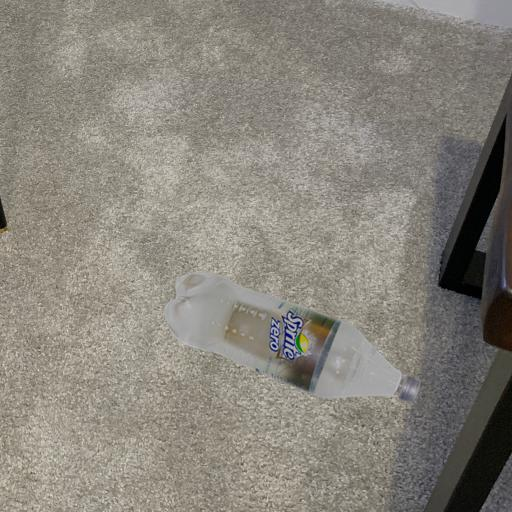

In [ ]:
PIL.Image.open(str(Plastic_Bottles[0]))

In [ ]:
Soda_Bottle = list(data_dir.glob('Soda Bottle/*'))
Soda_Bottle[:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00000355.jpg')]

In [ ]:
Soda_Bottle_count= len(Soda_Bottle)
print(Soda_Bottle_count)

5000


In [ ]:
print(Soda_Bottle[0])

/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00003723.jpg


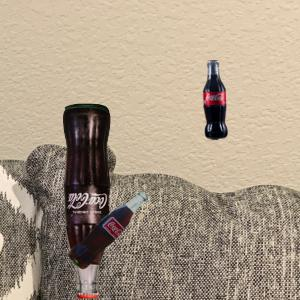

In [ ]:
PIL.Image.open(str(Soda_Bottle[0]))

In [ ]:
Water_Bottle = list(data_dir.glob('Water Bottle/*'))
Water_Bottle[:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00000355.jpg')]

In [ ]:
Water_Bottle_count= len(Water_Bottle)
print(Water_Bottle_count)

5000


In [ ]:
print(Water_Bottle[0])

/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00003723.jpg


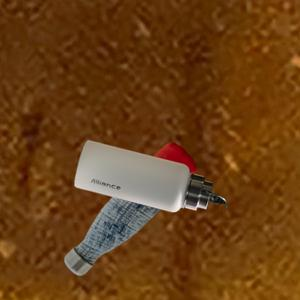

In [ ]:
PIL.Image.open(str(Water_Bottle[0]))

In [ ]:
Bottle_Images = {
    'PlasticBottles': list(data_dir.glob('Plastic Bottles/*.jpg')),
    'SodaBottle': list(data_dir.glob('Soda Bottle/*.jpg')),
    'WaterBottle': list(data_dir.glob('Water Bottle/*.jpg')),
}

In [ ]:
Bottle_labels = {
    'PlasticBottles': 0,
    'SodaBottle': 1,
    'WaterBottle': 2,
}

In [ ]:
Bottle_Images['PlasticBottles'][:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Plastic Bottles/00000355.jpg')]

In [ ]:
Bottle_Images['SodaBottle'][:5]

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Soda Bottle/00000355.jpg')]

In [ ]:
Bottle_Images['WaterBottle']

[PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00003723.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00002919.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00003340.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00002805.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00000355.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00004178.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00004536.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00000169.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00002377.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00000593.jpg'),
 PosixPath('/content/uncompressed/Bottle Images/Bottle Images/Water Bottle/00004044.jpg'),

In [ ]:
from re import I
x, y = [], []
for Bottle_name, images in Bottle_Images.items():
    for image in images:
      img = cv2.imread(str(image))
      resized_img = cv2.resize(img, (100, 100))
      x.append(resized_img)
      y.append(Bottle_labels[Bottle_name])

In [ ]:
x =np.array(x)
y = np.array(y)

In [ ]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [ ]:
num_classes = 3

model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer ='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
 model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


352/352 [==============================] - 108s 303ms/step - loss: 0.6038 - accuracy: 0.7255
Epoch 2/10
352/352 [==============================] - 105s 298ms/step - loss: 0.2575 - accuracy: 0.9041
Epoch 3/10
352/352 [==============================] - 100s 284ms/step - loss: 0.1540 - accuracy: 0.9437
Epoch 4/10
352/352 [==============================] - 104s 296ms/step - loss: 0.1074 - accuracy: 0.9615
Epoch 5/10
352/352 [==============================] - 103s 292ms/step - loss: 0.0773 - accuracy: 0.9719
Epoch 6/10
352/352 [==============================] - 101s 287ms/step - loss: 0.0469 - accuracy: 0.9840
Epoch 7/10
352/352 [==============================] - 103s 292ms/step - loss: 0.0333 - accuracy: 0.9891
Epoch 8/10
352/352 [==============================] - 103s 292ms/step - loss: 0.0307 - accuracy: 0.9903
Epoch 9/10
352/352 [==============================] - 105s 297ms/step - loss: 0.0148 - accuracy: 0.9958
Epoch 10/10
352/352 [==============================] - 102s 289ms/step - lo

In [ ]:
model.evaluate(x_test_scaled, y_test)

118/118 [==============================] - 9s 74ms/step - loss: 0.1405 - accuracy: 0.9629


[0.1405310183763504, 0.962933361530304]

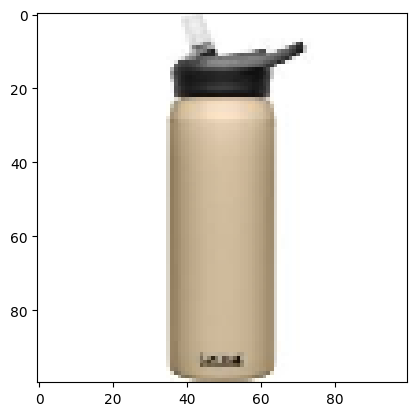

In [ ]:
img= cv2.imread("/content/download.jpeg")
rez_img= cv2.resize(img, (100,100))
plt.imshow(rez_img)
plt.show()
rez_img= rez_img.reshape(1,100,100,3)

In [ ]:
model.predict(rez_img)

1/1 [==============================] - 0s 128ms/step


array([[1., 0., 0.]], dtype=float32)